In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("./data/05_House Prices - Advanced Regression Techniques.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1 데이터 구조 파악

In [2]:
print(df.shape)
print(df.info())
print(df.describe())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [3]:
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


### 2 결측치 탐색

In [4]:
df.isna().sum().sort_values(ascending=False).head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
dtype: int64

In [5]:
df.isna().sum().sort_values(ascending=False).head(15) / len(df) *100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
dtype: float64

In [6]:
# PoolQC 수영장 품질
# 염기 서열

### 3 타깃변수 분포

<Axes: ylabel='Frequency'>

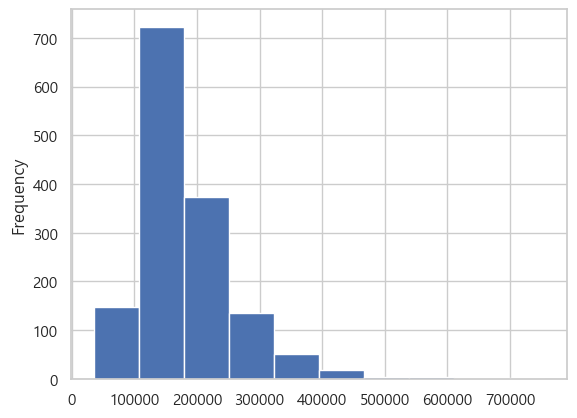

In [7]:
df['SalePrice'].plot(kind='hist')

<Axes: ylabel='Density'>

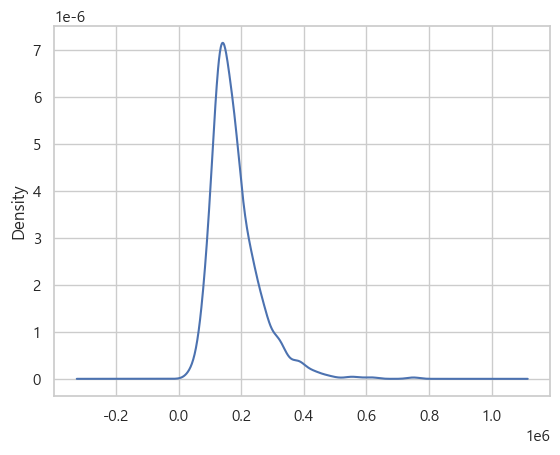

In [8]:
df['SalePrice'].plot(kind='kde')

<Axes: >

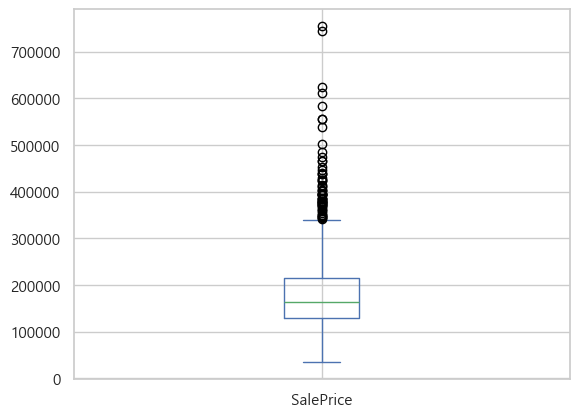

In [9]:
df['SalePrice'].plot(kind='box')

In [10]:
df['SalePrice'].skew()

np.float64(1.8828757597682129)

### 4 주요 수치형 변수들의 분포

<Axes: ylabel='Frequency'>

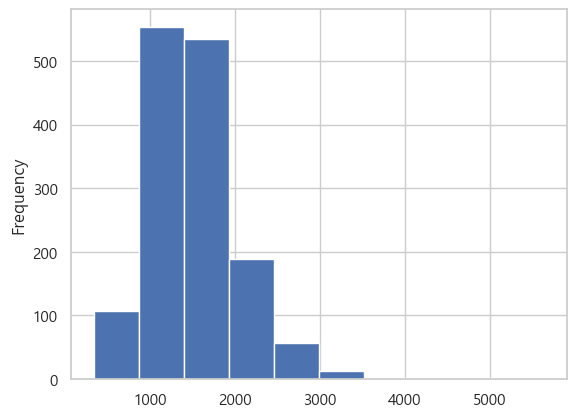

In [11]:
df['GrLivArea'].plot(kind='hist')

<Axes: ylabel='Frequency'>

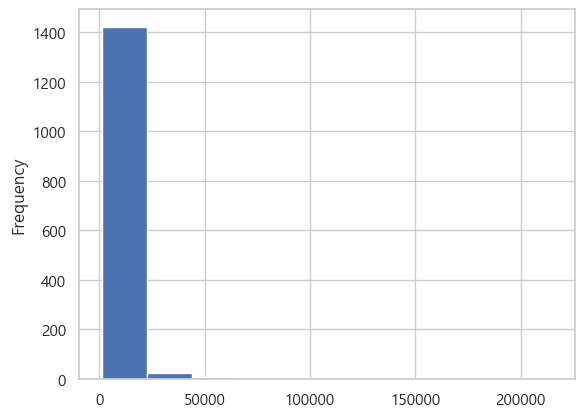

In [12]:
df['LotArea'].plot(kind='hist')

<Axes: ylabel='Frequency'>

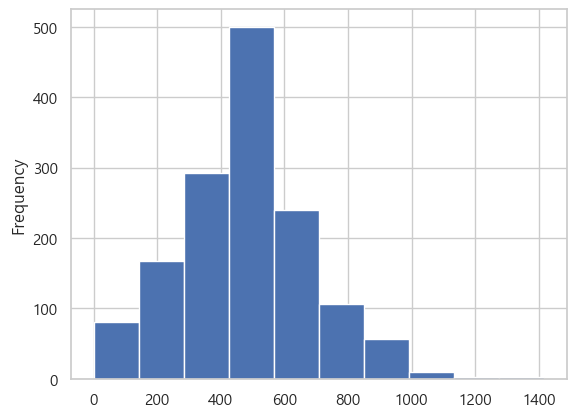

In [13]:
df['GarageArea'].plot(kind='hist')

In [14]:
print(df['GrLivArea'].describe())
print(df['GrLivArea'].skew())

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
1.3665603560164552


In [15]:
print(df['LotArea'].describe())
print(df['LotArea'].skew())

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
12.207687851233496


In [16]:
print(df['GarageArea'].describe())
print(df['GarageArea'].skew())

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
0.17998090674623907


* 오른쪽 꼬리가 긴(극단적으로 큰 값이 있는) 변수는 무엇인가요?
LotArea가 극단적으로 큰값이 있다.

### 5 범주형 변숩 분석

In [19]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [25]:
N_SP = df.groupby('Neighborhood')['SalePrice'].mean().head(10)

<Axes: xlabel='Neighborhood'>

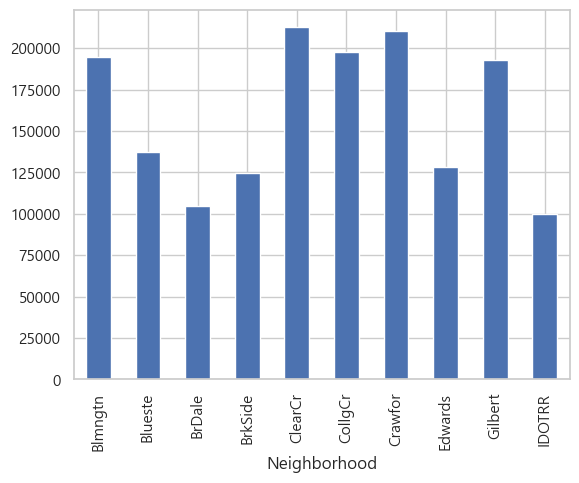

In [26]:
N_SP.plot(kind='bar')

ClearCr,Crawfor지역의 집값이 높다

### 6 로그 변환으로 분포 안정화하기

In [36]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [42]:
SalePrice = df['SalePrice']
SalePrice_log = np.log1p(SalePrice)

<Axes: ylabel='Frequency'>

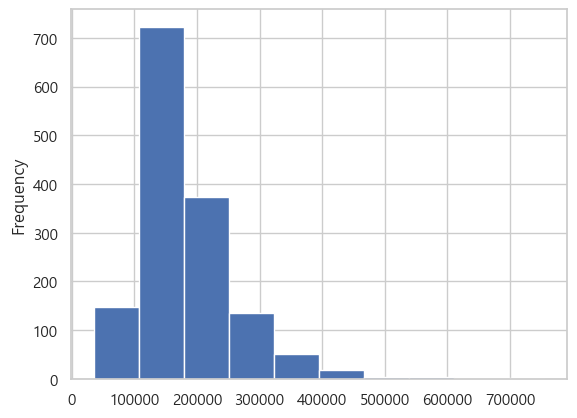

In [41]:
SalePrice.plot(kind='hist')

<Axes: ylabel='Frequency'>

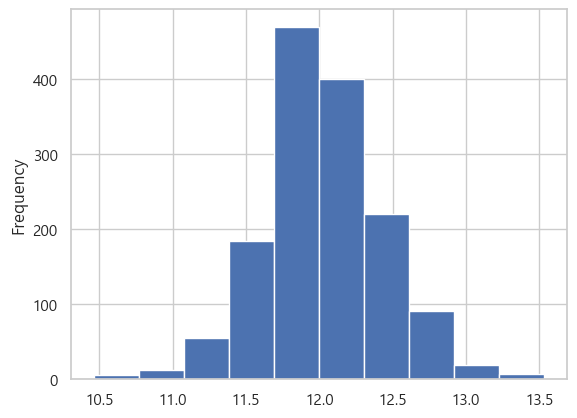

In [43]:
SalePrice_log.plot(kind='hist')

In [44]:
print(SalePrice.skew())
print(SalePrice_log.skew())

1.8828757597682129
0.12134661989685333


### 7 주요 변수와  SalePrice의 관계

<Figure size 640x480 with 0 Axes>

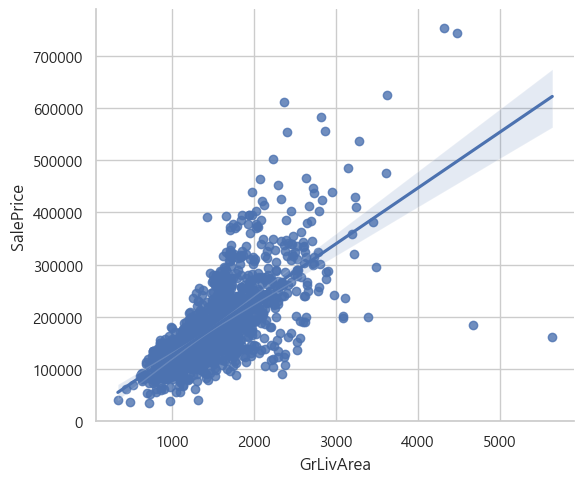

In [67]:
plt.figure()
sns.lmplot(data=df,x='GrLivArea',y='SalePrice',aspect=1.2)
plt.show()

<Figure size 640x480 with 0 Axes>

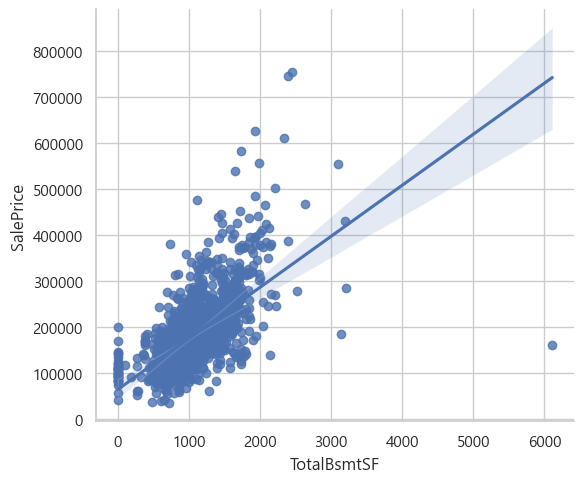

In [66]:
plt.figure()
sns.lmplot(data=df,x='TotalBsmtSF',y='SalePrice',aspect=1.2)
plt.show()

면적이 커질수록 가격이 증가하는 경향을 보이지만 꼭 면적이 커진다고 비싸지는 경향이 있다고 이야기 할 수는 없다

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

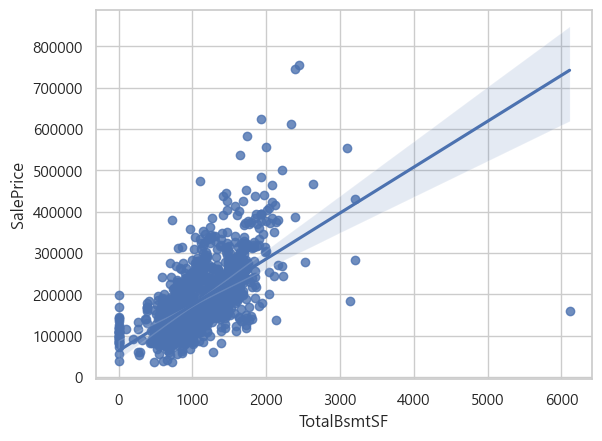

In [65]:
sns.regplot(data=df,x='TotalBsmtSF',y='SalePrice')

### 8 상관관계 분석